# Import Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data

In [20]:
df = pd.read_excel("/Users/Henry/Desktop/Housing_Regression_Prediction/kaggle.housing.train.csv.xlsx")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Choose Variables and Clean the Data

In [21]:
train = df[['MSSubClass','MSZoning','LotFrontage','LotShape','LandContour','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','Foundation','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','GarageType','GarageCars','GarageArea','PavedDrive','SaleType','SaleCondition','SalePrice']]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,...,2,Gd,8,Attchd,2,548,Y,WD,Normal,208500
1,20,RL,80.0,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,...,2,TA,6,Attchd,2,460,Y,WD,Normal,181500
2,60,RL,68.0,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,...,2,Gd,6,Attchd,2,608,Y,WD,Normal,223500
3,70,RL,60.0,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,...,1,Gd,7,Detchd,3,642,Y,WD,Abnorml,140000
4,60,RL,84.0,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,...,2,Gd,9,Attchd,3,836,Y,WD,Normal,250000


# Test and Fill NA

In [23]:
na=train.isna().sum()
na=na[na>0]
na

LotFrontage    259
Electrical       1
GarageType      81
dtype: int64

# Looping through a series

In [24]:
for i,r in na.items():
    print(i,r)

columns_with_nas = []
for i, r in na.items():
    columns_with_nas.append(i)
print(columns_with_nas)

LotFrontage 259
Electrical 1
GarageType 81
['LotFrontage', 'Electrical', 'GarageType']


# Seperate quantitative from qualitative data

In [26]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

quant_nas = []
qual_nas = []

for c in columns_with_nas:
    if c in quantitative:
        quant_nas.append(c)
    else:
        qual_nas.append(c)
        
print(quant_nas)
print(qual_nas)

['LotFrontage']
['Electrical', 'GarageType']


In [27]:
for c in quant_nas:
    train[c].fillna(value=train[c].mean(), inplace=True)
for c in qual_nas:
    train[c].fillna(value="NA", inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
train.isna().sum().sum()

0

# Understand Variables and Visualize

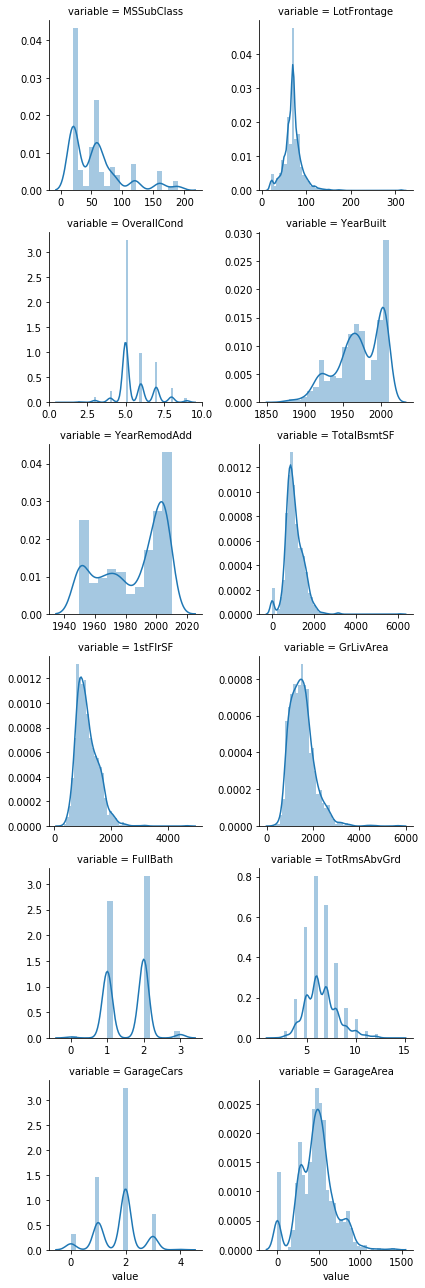

In [30]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


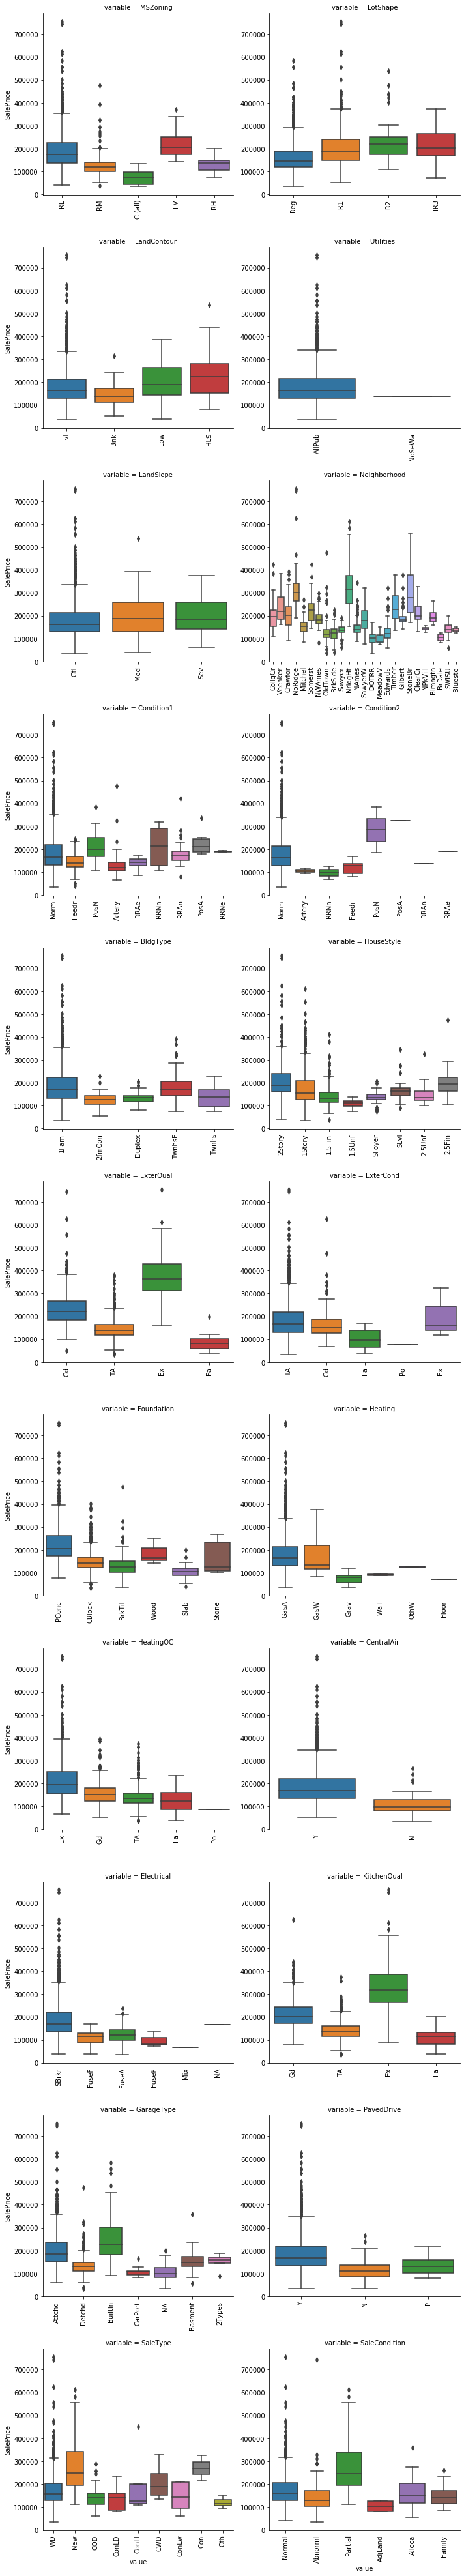

In [31]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

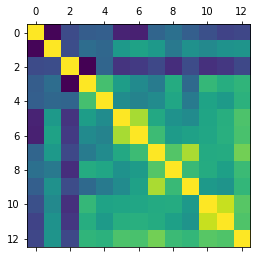

In [32]:
plt.matshow(train.corr())

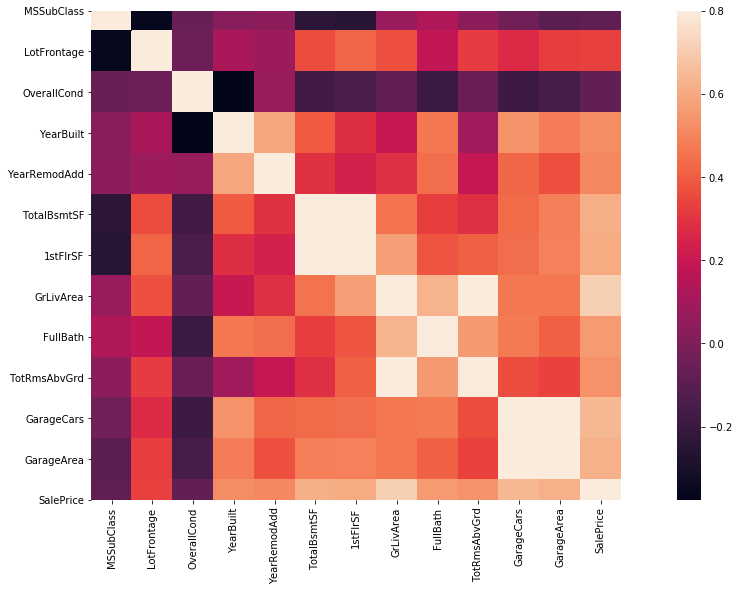

In [38]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [39]:
corr = train.corr()

rows, cols = corr.shape
flds = list(train.columns)

for i in range(cols):
    for j in range(i+1, cols):
        if corr.iloc[i,j] > 0.7:
            print(flds[i], ' ', flds[j], ' ', corr.iloc[i,j])

Utilities   LandSlope   0.8195299750050355
Neighborhood   Condition2   0.8254893743088377
Neighborhood   OverallCond   0.7086244776126511
BldgType   HouseStyle   0.8824754142814603


In [40]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,...,2,Gd,8,Attchd,2,548,Y,WD,Normal,208500
1,20,RL,80.0,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,...,2,TA,6,Attchd,2,460,Y,WD,Normal,181500
2,60,RL,68.0,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,...,2,Gd,6,Attchd,2,608,Y,WD,Normal,223500
3,70,RL,60.0,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,...,1,Gd,7,Detchd,3,642,Y,WD,Abnorml,140000
4,60,RL,84.0,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,...,2,Gd,9,Attchd,3,836,Y,WD,Normal,250000


In [41]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.334901
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

In [42]:
selected_features = corr["SalePrice"].sort_values(ascending=False)[1:15]
df=train


print(selected_features.index)

Index(['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'LotFrontage',
       'OverallCond', 'MSSubClass'],
      dtype='object')


In [43]:
train = train[selected_features.index]

In [47]:
print(train.head())
print(df.head())

   GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  \
0       1710           2         548          856       856         2   
1       1262           2         460         1262      1262         2   
2       1786           2         608          920       920         2   
3       1717           3         642          756       961         1   
4       2198           3         836         1145      1145         2   

   TotRmsAbvGrd  YearBuilt  YearRemodAdd  LotFrontage  OverallCond  MSSubClass  
0             8       2003          2003         65.0            5          60  
1             6       1976          1976         80.0            8          20  
2             6       2001          2002         68.0            5          60  
3             7       1915          1970         60.0            5          70  
4             9       2000          2000         84.0            5          60  
   MSSubClass MSZoning  LotFrontage LotShape LandContour Utilities LandSlop

## Build and Test Your Model

In [48]:
from sklearn.linear_model import LinearRegression
X = train
y = df["SalePrice"]

reg = LinearRegression().fit(X, y)

In [51]:
test = pd.read_excel("/Users/Henry/Desktop/Housing_Regression_Prediction/kaggle.housing.test.csv.xlsx")
pred_ids = test["Id"]
test = test[selected_features.index]
test.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotFrontage,OverallCond,MSSubClass
0,896,1.0,730.0,882.0,896,1,5,1961,1961,80.0,6,20
1,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,81.0,6,20
2,1629,2.0,482.0,928.0,928,2,6,1997,1998,74.0,5,60
3,1604,2.0,470.0,926.0,926,2,7,1998,1998,78.0,6,60
4,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,43.0,5,120


In [52]:
test.isna().sum()

GrLivArea         0
GarageCars        1
GarageArea        1
TotalBsmtSF       1
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
LotFrontage     227
OverallCond       0
MSSubClass        0
dtype: int64

In [53]:
for c in test.columns:
    if c in quant_nas:
        test[c].fillna(value=test[c].mean(), inplace=True)
    if c in qual_nas:
        test[c].fillna(value="NA", inplace=True)
test = test.fillna(test.median())

In [54]:
preds = reg.predict(test)

In [56]:
output = pd.DataFrame({'Id': pred_ids,
                      'SalePrice': preds})
output.to_csv('/Users/Henry/Desktop/Housing_Regression_Prediction/Result/submission.csv', index=False)

In [57]:
test.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotFrontage,OverallCond,MSSubClass
0,896,1.0,730.0,882.0,896,1,5,1961,1961,80.0,6,20
1,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,81.0,6,20
2,1629,2.0,482.0,928.0,928,2,6,1997,1998,74.0,5,60
3,1604,2.0,470.0,926.0,926,2,7,1998,1998,78.0,6,60
4,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,43.0,5,120
